In [1]:
# Plot Raster Data Layers Using EarthPy
# --------------------------------------
#
# .. note::
#    The examples below will show you how to use the ``plot_bands()`` function
#    to plot individual raster layers in images using python. To plot rgb data,
#    read help documentation related to ``ep.plot_rgb()``.
#
# In this vignette, you will use Landsat 8 data. To begin, you will create a
# stack of bands using Landsat 8 data. You will then plot the raster layers.

In [2]:
import os
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

C:\Users\mac\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [34]:
file_path = 'C:/Users/mac/Documents/Python_Rasterio/AbayaLake/'

In [35]:
# Stack the landsat bands
# This creates a numpy array with each "layer" representing a single band

landsat_paths = glob(
    "C:/Users/mac/Documents/Python_Rasterio/AbayaLake/LC08_L1TP_169056_20190312_20190325_01_T1_b*[1-7]*.tif"
     )

landsat_paths.sort()
array_stack, meta = es.stack(landsat_paths, nodata=-9999)

In [36]:
# Use some landsat 8 images:
#date = '2014-01-25'
#url = glob('http://landsat-pds.s3.amazonaws.com/c1/L8/169/056/LC08_L1TP_169056_20140125_20170426_01_T1/LC08_L1TP_169056_20140125_20170426_01_T1_b*.TIF')

#url.sort()
#ublue_band = 'LC08_L1TP_169056_20140125_20170426_01_T1_B{}.TIF'.format(1)
#blue_band = 'LC08_L1TP_169056_20140125_20170426_01_T1_B{}.TIF'.format(2)
#green_band = 'LC08_L1TP_169056_20140125_20170426_01_T1_B{}.TIF'.format(3)
#red_band = 'LC08_L1TP_169056_20140125_20170426_01_T1_B{}.TIF'.format(4)
#nir_band = 'LC08_L1TP_169056_20140125_20170426_01_T1_B{}.TIF'.format(5)
#swir1_band = 'LC08_L1TP_169056_20140125_20170426_01_T1_B{}.TIF'.format(6)
#swir2_band = 'LC08_L1TP_169056_20140125_20170426_01_T1_B{}.TIF'.format(7)

#url.sort()
#arr_st, meta = es.stack(url)

### Plot All Bands in a Stack

When you give ``ep.plot_bands()`` a three dimensional numpy array,
it will plot all layers in the numpy array. You can create unique titles for
each image by providing a list of titles using the ``title=`` parameter.
The list must contain the same number of strings as there are bands in the stack.

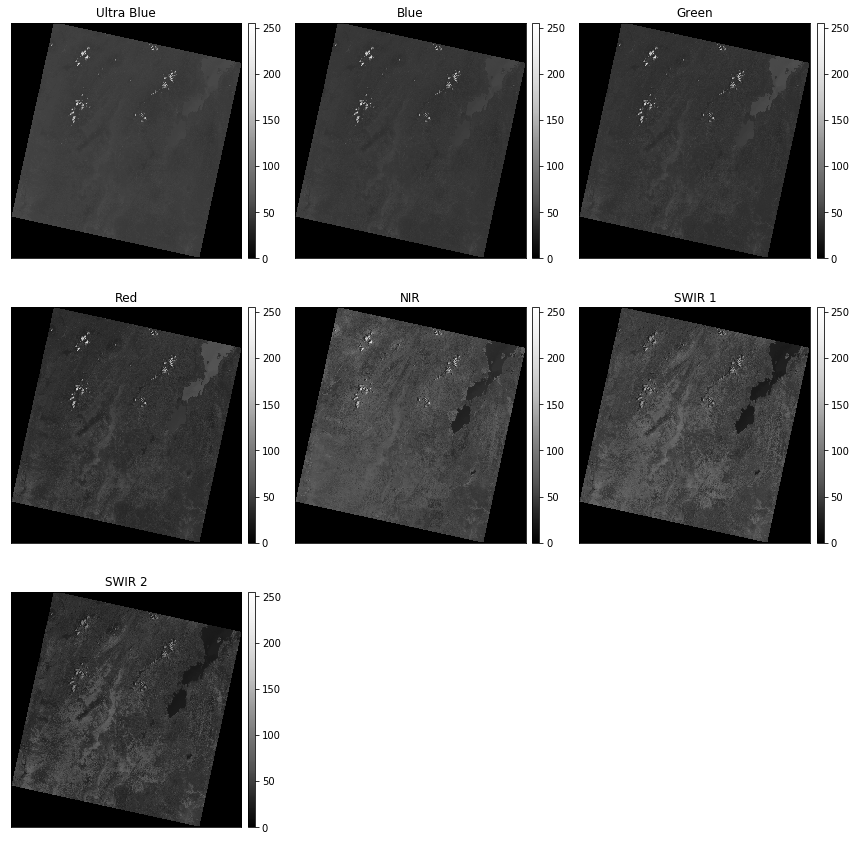

In [37]:
titles = ["Ultra Blue", "Blue", "Green", "Red", "NIR", "SWIR 1", "SWIR 2"]
# sphinx_gallery_thumbnail_number = 5
ep.plot_bands(array_stack, title=titles)
plt.show()

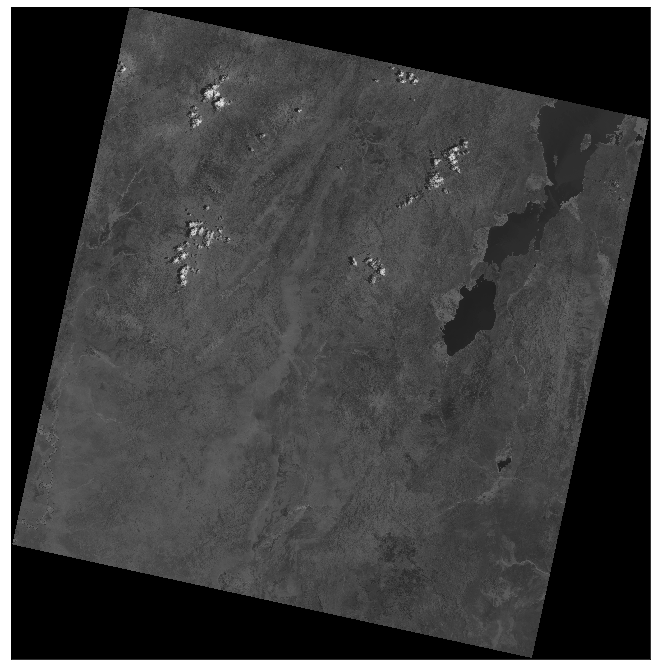

In [38]:
# Plot One Band in a Stack
# ------------------------
#
# If you give ``ep.plot_bands()`` a one dimensional numpy array,
# it will only plot that single band. You can turn off the
# colorbar using the ``cbar`` parameter (``cbar=False``).

ep.plot_bands(array_stack[4], cbar=False)
plt.show()

### Turn Off Scaling


``ep.plot_bands()`` scales the imagery to a 0-255 scale by default. This range
 of values makes it easier for matplotlib to plot the data. To turn off
 scaling, set the scale parameter to ``False``. Below you
 plot NDVI with scaling turned off in order for the proper range of values
 (-1 to 1) to be displayed. You can use the ``cmap=`` parameter to adjust
 the colormap for the plot


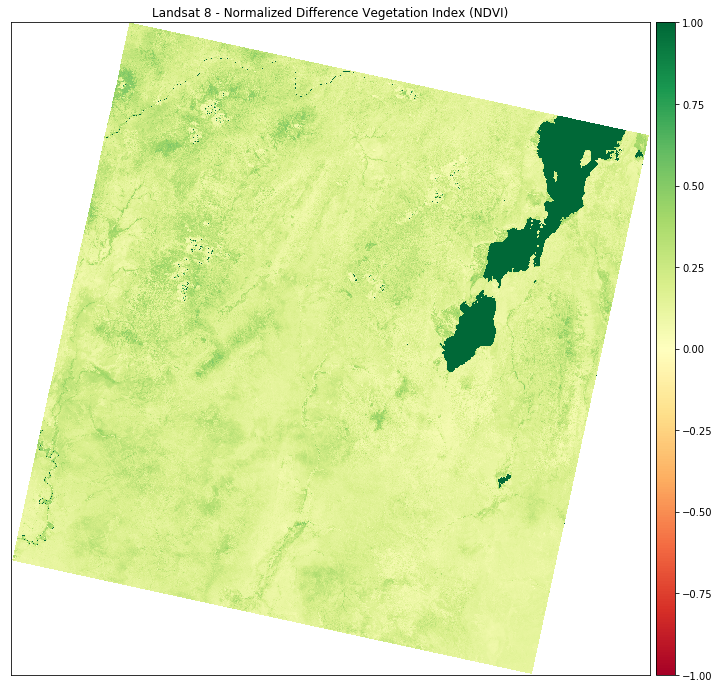

In [50]:
# Plot NDVI With Colorbar Legend of Continuous Values
# # You can plot NDVI with a colorbar legend of continuous values using the
# ``plot_bands`` function from the ``earthpy.plot`` module.

NDVI = es.normalized_diff(array_stack[4], array_stack[3])

titles = ["Landsat 8 - Normalized Difference Vegetation Index (NDVI)"]

ep.plot_bands(NDVI, cmap="RdYlGn", cols=1,title = titles, scale=False, vmin=-1, vmax=1
)
plt.show()

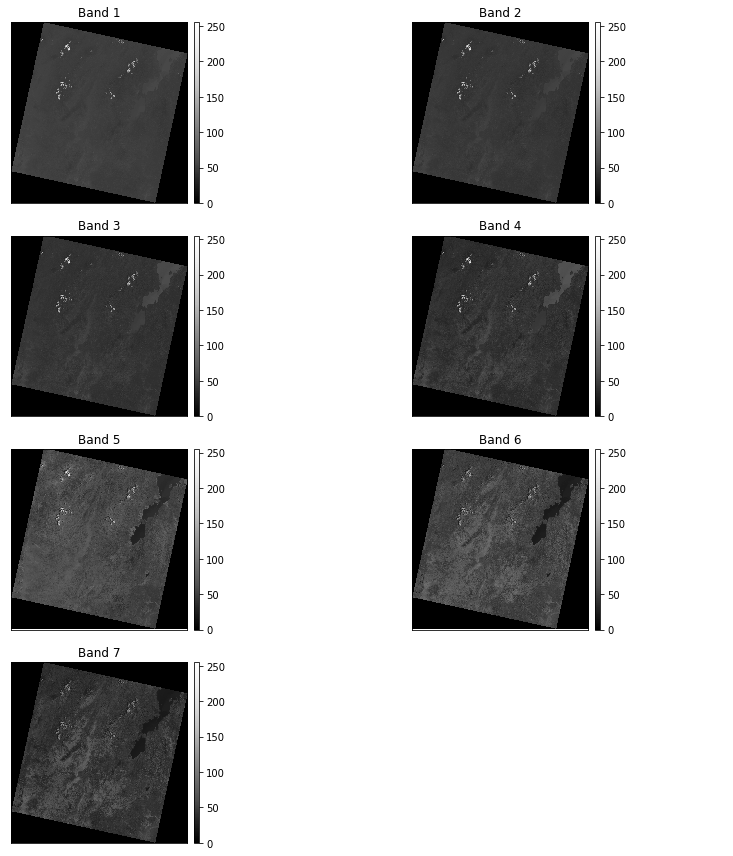

In [47]:
# Adjust the Number of Columns for a Multi Band Plot
# The number of columns used while plotting multiple bands can be changed in order
# to change the arrangement of the images overall.

ep.plot_bands(array_stack, cols=2)
plt.show()